In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory

# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/m5-forecasting-accuracy/calendar.csv
/kaggle/input/m5-forecasting-accuracy/sample_submission.csv
/kaggle/input/m5-forecasting-accuracy/sell_prices.csv
/kaggle/input/m5-forecasting-accuracy/sales_train_validation.csv
/kaggle/input/m5-forecasting-accuracy/sales_train_evaluation.csv


In [2]:
import pandas as pd
import numpy as np
import random


## calendar

In [3]:
calendar = pd.read_csv("../input/m5-forecasting-accuracy/calendar.csv")
calendar.head(5)


,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1


In [4]:
calendar["events_names"] = calendar[["event_name_1", "event_name_2"]].fillna('').sum(axis=1).replace('', 'None')
calendar.events_names

0                           None
1                           None
2                           None
3                           None
4                           None
                  ...           
1964                        None
1965                        None
1966                        None
1967                        None
1968    NBAFinalsEndFather's day
Name: events_names, Length: 1969, dtype: object

In [5]:
calendar['events_types'] = calendar[['event_type_1', 'event_type_2']].fillna('').sum(axis=1).replace('', 'None')

In [6]:
calendar['next_events_names'] = calendar[['event_name_1', 'event_name_2']].fillna('').sum(axis=1).replace('', np.nan).fillna(method='bfill')
calendar['next_events_names'] 

0                      SuperBowl
1                      SuperBowl
2                      SuperBowl
3                      SuperBowl
4                      SuperBowl
                  ...           
1964    NBAFinalsEndFather's day
1965    NBAFinalsEndFather's day
1966    NBAFinalsEndFather's day
1967    NBAFinalsEndFather's day
1968    NBAFinalsEndFather's day
Name: next_events_names, Length: 1969, dtype: object

In [7]:
calendar['next_events_types'] =calendar[['event_type_1', 'event_type_2']].fillna('').sum(axis=1).replace('', np.nan).fillna(method='bfill')

calendar['next_events_types']

0               Sporting
1               Sporting
2               Sporting
3               Sporting
4               Sporting
              ...       
1964    SportingCultural
1965    SportingCultural
1966    SportingCultural
1967    SportingCultural
1968    SportingCultural
Name: next_events_types, Length: 1969, dtype: object

In [8]:
calendar['event_name_1'] = pd.Categorical(calendar['event_name_1'].fillna('None'))
calendar['event_type_1'] = pd.Categorical(calendar['event_type_1'].fillna('None'))
calendar['event_name_2'] = pd.Categorical(calendar['event_name_2'].fillna('None'))
calendar['event_type_2'] = pd.Categorical(calendar['event_type_2'].fillna('None'))
calendar.head(5)

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,events_names,events_types,next_events_names,next_events_types
0,2011-01-29,11101,Saturday,1,1,2011,d_1,None,None,None,None,0,0,0,None,None,SuperBowl,Sporting
1,2011-01-30,11101,Sunday,2,1,2011,d_2,None,None,None,None,0,0,0,None,None,SuperBowl,Sporting
2,2011-01-31,11101,Monday,3,1,2011,d_3,None,None,None,None,0,0,0,None,None,SuperBowl,Sporting
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,None,None,None,None,1,1,0,None,None,SuperBowl,Sporting
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,None,None,None,None,1,0,1,None,None,SuperBowl,Sporting


In [9]:
calendar['d'] = pd.Categorical(calendar['d'])

In [10]:
calendar.wm_yr_wk.value_counts()

11101    7
11429    7
11435    7
11434    7
11433    7
        ..
11249    7
11250    7
11251    7
11252    7
11621    2
Name: wm_yr_wk, Length: 282, dtype: int64

In [11]:
calendar['wm_yr_wk'] = pd.Categorical(calendar['wm_yr_wk'],categories=calendar.wm_yr_wk.unique(), ordered=True)

In [12]:
calendar['date'] = pd.to_datetime(calendar['date'], format='%Y-%m-%d')
calendar['wday'] = calendar['wday'].astype(np.int8)

In [13]:
calendar['snap_CA'] = calendar['snap_CA'].astype(bool)
calendar['snap_TX'] = calendar['snap_TX'].astype(bool)
calendar['snap_WI'] = calendar['snap_WI'].astype(bool)

In [14]:
calendar.drop(['year', 'weekday', 'month', 'wday'], axis=1, inplace=True)

In [15]:
calendar.head(10)

,date,wm_yr_wk,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,events_names,events_types,next_events_names,next_events_types
0,2011-01-29,11101,d_1,None,None,None,None,False,False,False,None,None,SuperBowl,Sporting
1,2011-01-30,11101,d_2,None,None,None,None,False,False,False,None,None,SuperBowl,Sporting
2,2011-01-31,11101,d_3,None,None,None,None,False,False,False,None,None,SuperBowl,Sporting
3,2011-02-01,11101,d_4,None,None,None,None,True,True,False,None,None,SuperBowl,Sporting
4,2011-02-02,11101,d_5,None,None,None,None,True,False,True,None,None,SuperBowl,Sporting
5,2011-02-03,11101,d_6,None,None,None,None,True,True,True,None,None,SuperBowl,Sporting
6,2011-02-04,11101,d_7,None,None,None,None,True,False,False,None,None,SuperBowl,Sporting
7,2011-02-05,11102,d_8,None,None,None,None,True,True,True,None,None,SuperBowl,Sporting
8,2011-02-06,11102,d_9,SuperBowl,Sporting,None,None,True,True,True,SuperBowl,Sporting,SuperBowl,Sporting
9,2011-02-07,11102,d_10,None,None,None,None,True,True,False,None,None,ValentinesDay,Cultural


In [16]:
calendar['day_of_month'] =calendar['date'].dt.day.astype(np.int8)
calendar['day_of_week'] = calendar['date'].dt.dayofweek.astype(np.int8)

In [17]:
events_all_datas = calendar[(calendar["event_name_1"] != 'None') | (calendar["event_name_2"] != 'None')]

In [18]:
prev = 0
for event in events_all_datas.iterrows():
    calendar.loc[prev:event[0], 'days_to_event'] = (calendar.loc[event[0], 'date'] - calendar.loc[prev:event[0], 'date']).dt.days
    prev = event[0]

In [19]:
calendar['days_to_event'] = calendar['days_to_event'].replace(0, 25).astype(np.int8)

In [20]:
events_names_dict = calendar['events_names'].value_counts().rank(method='first').to_dict()
events_types_dict = calendar['events_types'].value_counts().rank(method='first').to_dict()
calendar['events_names'] = calendar['events_names'].map(events_names_dict).astype(np.int8)
calendar['events_types'] = calendar['events_types'].map(events_types_dict).astype(np.int8)
calendar['next_events_names'] = calendar['next_events_names'].map(events_names_dict).astype(np.int8)
calendar['next_events_types'] = calendar['next_events_types'].map(events_types_dict).astype(np.int8)


In [21]:
calendar.drop(['event_name_1', 'event_name_2', 'event_type_1', 'event_type_2'], axis=1, inplace=True)

In [22]:
calendar

,date,wm_yr_wk,d,snap_CA,snap_TX,snap_WI,events_names,events_types,next_events_names,next_events_types,day_of_month,day_of_week,days_to_event
0,2011-01-29,11101,d_1,False,False,False,35,8,24,4,29,5,8
1,2011-01-30,11101,d_2,False,False,False,35,8,24,4,30,6,7
2,2011-01-31,11101,d_3,False,False,False,35,8,24,4,31,0,6
3,2011-02-01,11101,d_4,True,True,False,35,8,24,4,1,1,5
4,2011-02-02,11101,d_5,True,False,True,35,8,24,4,2,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1964,2016-06-15,11620,d_1965,False,True,True,35,8,4,3,15,2,4
1965,2016-06-16,11620,d_1966,False,False,False,35,8,4,3,16,3,3
1966,2016-06-17,11620,d_1967,False,False,False,35,8,4,3,17,4,2
1967,2016-06-18,11621,d_1968,False,False,False,35,8,4,3,18,5,1


## sell_prices

In [23]:
sell_prices = pd.read_csv("../input/m5-forecasting-accuracy/sell_prices.csv")
sell_prices.head(10)

,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26
5,CA_1,HOBBIES_1_001,11330,8.26
6,CA_1,HOBBIES_1_001,11331,8.26
7,CA_1,HOBBIES_1_001,11332,8.26
8,CA_1,HOBBIES_1_001,11333,8.26
9,CA_1,HOBBIES_1_001,11334,8.26


In [24]:
# def features_function(sell_prices: pd.core.frame.DataFrame) -> pd.core.frame.DataFrame:
#     print("features_function start")
    
#     sell_prices['store_id'] = pd.Categorical(sell_prices['store_id'])
#     sell_prices['item_id'] = pd.Categorical(sell_prices['item_id'])
#     sell_prices['wm_yr_wk'] = pd.Categorical(sell_prices['wm_yr_wk'],categories=sell_prices.wm_yr_wk.unique(), ordered=True)

#     sell_prices['dept_id'] = pd.Categorical(sell_prices['item_id'].str.slice(stop=-4))
#     sell_prices['cat_id'] = pd.Categorical(sell_prices['item_id'].str.slice(stop=-6))
#     sell_prices['state_id'] = pd.Categorical(sell_prices['store_id'].str.slice(stop=-2))
#     sell_prices['sell_price'] = sell_prices['sell_price'].replace((np.inf, -np.inf, np.nan), 0).astype(np.float16)
    

In [25]:

sell_prices['store_id'] = pd.Categorical(sell_prices['store_id'])
sell_prices['item_id'] = pd.Categorical(sell_prices['item_id'])
sell_prices['wm_yr_wk'] = pd.Categorical(sell_prices['wm_yr_wk'],categories=sell_prices.wm_yr_wk.unique(), ordered=True)


In [26]:
sell_prices['dept_id'] = pd.Categorical(sell_prices['item_id'].str.slice(stop=-4))
sell_prices['cat_id'] = pd.Categorical(sell_prices['item_id'].str.slice(stop=-6))
sell_prices['state_id'] = pd.Categorical(sell_prices['store_id'].str.slice(stop=-2))
sell_prices['sell_price'] = sell_prices['sell_price'].replace((np.inf, -np.inf, np.nan), 0).astype(np.float16)

In [27]:
# sell_prices

In [28]:
import category_encoders
from scipy import stats

In [29]:
VAL_CUTOFF = '2015-05-01'
TRAIN_CUTOFF = '2012-01-01'

In [30]:
import gc

In [31]:
sales = pd.read_csv('../input/m5-forecasting-accuracy/sales_train_evaluation.csv')

In [32]:
def merge (sell_prices: pd.core.frame.DataFrame) -> pd.core.frame.DataFrame:
    print("merge begin")
    
    sell_prices = sell_prices.merge(calendar, on=['wm_yr_wk'], how='left')
    sell_prices.drop(['wm_yr_wk'], axis=1, inplace=True)
    sell_prices =  sell_prices.merge(pd.melt(sales, id_vars=['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id'], var_name='d', value_name='demand')[['item_id', 'store_id', 'd', 'demand']], 
              on=['item_id', 'store_id', 'd'],how='left')
    sell_prices["month"] = sell_prices['date'].dt.month.astype(np.int8)
    sell_prices["year"] = sell_prices['date'].dt.year.astype(np.int16)
    sell_prices.drop(['year', 'month'], axis=1, inplace=True)
    gc.collect()
    
    print("merge end")
    return sell_prices

In [33]:
# sell_prices = sell_prices.merge(calendar, on=['wm_yr_wk'], how='left')


In [34]:
# sell_prices

In [35]:
#  sell_prices.drop(['wm_yr_wk'], axis=1, inplace=True)

In [36]:
#  sell_prices =  sell_prices.merge(pd.melt(sales, id_vars=['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id'], var_name='d', value_name='demand')[['item_id', 'store_id', 'd', 'demand']], 
#               on=['item_id', 'store_id', 'd'],how='left')

In [37]:
# sell_prices["month"] = sell_prices['date'].dt.month.astype(np.int8)
# sell_prices["year"] = sell_prices['date'].dt.year.astype(np.int16)
# sell_prices

In [38]:
# sell_prices.drop(['year', 'month'], axis=1, inplace=True)


In [39]:
#  gc.collect()

In [40]:
def data_type_processing (sell_prices: pd.core.frame.DataFrame) -> pd.core.frame.DataFrame:
    print("data_type_processing start")
    
    sell_prices['store_id'] = pd.Categorical(sell_prices['store_id'])
    sell_prices['item_id'] = pd.Categorical(sell_prices['item_id'])
    sell_prices['id'] = pd.Categorical(sell_prices['item_id'].str.cat(sell_prices['store_id'], sep='_'))
    sell_prices['d'] = sell_prices['d'].str.slice(start = 2).astype(np.int16)
    sell_prices['demand'] = sell_prices['demand'].astype(np.float16)
    
    for i in sell_prices.state_id.unique():
        flag = sell_prices['state_id'] == i
        sell_prices.loc[flag, 'is_snap_avaliable'] = sell_prices.loc[flag, f'snap_{i}']
    
    sell_prices['is_snap_avaliable'] = sell_prices['is_snap_avaliable'].astype(bool)
    sell_prices.drop(['snap_TX', 'snap_CA', 'snap_WI'], axis=1, inplace=True)
    
    gc.collect()
    print("data_type_processing end")
    return sell_prices


In [41]:
# sell_prices['store_id'] = pd.Categorical(sell_prices['store_id'])
# sell_prices['item_id'] = pd.Categorical(sell_prices['item_id'])
# sell_prices['id'] = pd.Categorical(sell_prices['item_id'].str.cat(sell_prices['store_id'], sep='_'))
# sell_prices['d'] = sell_prices['d'].str.slice(start = 2).astype(np.int16)
# sell_prices['demand'] = sell_prices['demand'].astype(np.float16)

In [42]:
# for i in sell_prices.state_id.unique():
#     flag = sell_prices['state_id'] == i
#     sell_prices.loc[flag, 'is_snap_avaliable'] = sell_prices.loc[flag, f'snap_{i}']

In [43]:
# sell_prices['is_snap_avaliable'] = sell_prices['is_snap_avaliable'].astype(bool)
# sell_prices.drop(['snap_TX', 'snap_CA', 'snap_WI'], axis=1, inplace=True)

In [44]:
# sell_prices

In [45]:
# gc.collect()

In [46]:
def demand_features (sell_prices: pd.core.frame.DataFrame) -> pd.core.frame.DataFrame:
    print("demand_features start")
    
    days = 29
    sell_prices[f'cumulative_mean_demand_{days}d_ago'] = (sell_prices.groupby(['store_id', 'item_id']).demand
                                                         .transform(lambda x : x.shift(days).expanding().mean())
                                                         .replace((np.inf, -np.inf, np.nan), 0)
                                                         .astype(np.int16))   
    sell_prices[f'cumulative_md_low_demand_{days}d_ago'] = (sell_prices.groupby(['store_id', 'item_id']).demand
                                                         .transform(lambda x : x.shift(days).expanding().median())
                                                         .replace((np.inf, -np.inf, np.nan), 0)
                                                         .astype(np.int16)) 
    for i in [1, 4, 8]:
        sell_prices[f'ewm_mean_{i}w_demand_{days}d_ago'] = (sell_prices.groupby(['store_id', 'item_id']).demand
                                                         .transform(lambda x : x.shift(days).ewm(span=7*i).mean())
                                                         .replace((np.inf, -np.inf, np.nan), 0)
                                                         .astype(np.float16))
        sell_prices[f'rolling_mean_{i}w_demand_{days}d_ago'] = (sell_prices.groupby(['store_id', 'item_id']).demand
                                                         .transform(lambda x : x.shift(days).rolling(7*i).mean())
                                                         .replace((np.inf, -np.inf, np.nan), 0)
                                                         .astype(np.float16))
    gc.collect()
    print("demand_features end")
    return sell_prices



In [47]:
# days = 29


In [48]:
# sell_prices[f'cumulative_mean_demand_{days}d_ago'] = (sell_prices.groupby(['store_id', 'item_id']).demand
#                                                      .transform(lambda x : x.shift(days).expanding().mean())
#                                                      .replace((np.inf, -np.inf, np.nan), 0)
#                                                      .astype(np.int16))

In [49]:
# sell_prices[f'cumulative_md_low_demand_{days}d_ago'] = (sell_prices.groupby(['store_id', 'item_id']).demand
#                                                      .transform(lambda x : x.shift(days).expanding().median())
#                                                      .replace((np.inf, -np.inf, np.nan), 0)
#                                                      .astype(np.int16))

In [50]:
# for i in [1, 4, 8]:
#     sell_prices[f'ewm_mean_{i}w_demand_{days}d_ago'] = (sell_prices.groupby(['store_id', 'item_id']).demand
#                                                      .transform(lambda x : x.shift(days).ewm(span=7*i).mean())
#                                                      .replace((np.inf, -np.inf, np.nan), 0)
#                                                      .astype(np.float16))
#     sell_prices[f'rolling_mean_{i}w_demand_{days}d_ago'] = (sell_prices.groupby(['store_id', 'item_id']).demand
#                                                      .transform(lambda x : x.shift(days).rolling(7*i).mean())
#                                                      .replace((np.inf, -np.inf, np.nan), 0)
#                                                      .astype(np.float16))

In [51]:
# sell_prices

In [52]:
# gc.collect()

In [53]:
def encoding (sell_prices: pd.core.frame.DataFrame) -> pd.core.frame.DataFrame:
    print("encoding start")
    
    for features in ['store_id', 'item_id', 'dept_id']:
        encoder = category_encoders.CatBoostEncoder(handle_unknown='value', handle_missing='value', a=1e-9)
        encoder.fit(sell_prices.loc[sell_prices.date < VAL_CUTOFF, features], sell_prices.loc[sell_prices.date < VAL_CUTOFF, "demand"])
        sell_prices[features] = encoder.transform(sell_prices[features]).astype(np.float16)
        del encoder

        if(features == 'store_id') or (features == 'dept_id'):
            dict =  {i: j for i, j in zip(sell_prices[features].unique(), stats.rankdata(sell_prices[features].unique()))}
            sell_prices[features] = sell_prices[features].map(dict).astype(np.int8)
    
    sell_prices['expected_item_revenue'] = (sell_prices['item_id'] * sell_prices['sell_price']).replace((np.inf, -np.inf, np.nan), 0).astype(np.float16)
    
    sell_prices['is_in_CA'] = sell_prices['state_id'] == 'CA'
    sell_prices['is_in_TX'] = sell_prices['state_id'] == 'TX'
    sell_prices['is_in_WI'] = sell_prices['state_id'] == 'WI'
    
    sell_prices.drop(['state_id'], axis=1, inplace=True)
    
    sell_prices['is_foods'] = sell_prices['cat_id'] == 'FOODS'
    sell_prices['is_household'] = sell_prices['cat_id'] == 'HOUSEHOLD'
    sell_prices['is_hobbies'] =sell_prices['cat_id'] == 'HOBBIES'
    
    sell_prices.drop(['cat_id'], axis=1, inplace=True)
    
    gc.collect()
    print("encoding end")
    return sell_prices

In [54]:
# for features in ['store_id', 'item_id', 'dept_id']:
#     encoder = category_encoders.CatBoostEncoder(handle_unknown='value', handle_missing='value', a=1e-9)
#     encoder.fit(sell_prices.loc[sell_prices.date < VAL_CUTOFF, features], sell_prices.loc[sell_prices.date < VAL_CUTOFF, "demand"])
#     sell_prices[features] = encoder.transform(sell_prices[features]).astype(np.float16)
#     del encoder
    
#     if(features == 'store_id') or (features == 'dept_id'):
#         dict =  {i: j for i, j in zip(sell_prices[features].unique(), stats.rankdata(sell_prices[features].unique()))}
#         sell_prices[features] = sell_prices[features].map(dict).astype(np.int8)

In [55]:
# sell_prices['expected_item_revenue'] = (sell_prices['item_id'] * sell_prices['sell_price']).replace((np.inf, -np.inf, np.nan), 0).astype(np.float16)


In [56]:
# sell_prices['is_in_CA'] = sell_prices['state_id'] == 'CA'
# sell_prices['is_in_TX'] = sell_prices['state_id'] == 'TX'
# sell_prices['is_in_WI'] = sell_prices['state_id'] == 'WI'

In [57]:
# sell_prices.drop(['state_id'], axis=1, inplace=True)

In [58]:
# sell_prices['is_foods'] = sell_prices['cat_id'] == 'FOODS'
# sell_prices['is_household'] = sell_prices['cat_id'] == 'HOUSEHOLD'
# sell_prices['is_hobbies'] =sell_prices['cat_id'] == 'HOBBIES'

In [59]:
# sell_prices.drop(['cat_id'], axis=1, inplace=True)

In [60]:
# gc.collect()

In [61]:
def cut (sell_prices: pd.core.frame.DataFrame) -> pd.core.frame.DataFrame:
    print("cut start")
    
    sell_prices = sell_prices.loc[sell_prices.date >= TRAIN_CUTOFF]
    
    gc.collect()
    print("cut end")
    return sell_prices.reset_index(drop=True) 

In [62]:
def train_test_split(sell_prices: pd.core.frame.DataFrame) -> list:
    print("train_test_split start")
    
    X_train = sell_prices[(sell_prices.date < VAL_CUTOFF)].drop(['demand', 'date', 'id', 'd'], axis=1)
    X_valid = sell_prices[(sell_prices['d'] < 1942) & (sell_prices.date >= VAL_CUTOFF)].drop(['demand', 'date', 'id', 'd'], axis=1)
    X_test = sell_prices[sell_prices['d'] >= 1914].drop(['demand', 'd'], axis=1)
    y_train = sell_prices[(sell_prices.date < VAL_CUTOFF)]['demand'].astype(np.int16)
    y_valid = sell_prices[(sell_prices['d'] < 1942) & (sell_prices.date >= VAL_CUTOFF)]['demand'].astype(np.int16)
    
    gc.collect()
    print("train_test_split end")
    return [X_train, X_valid, X_test, y_train, y_valid]

In [63]:
%%time
X_train, X_valid, X_test, y_train, y_valid = (sell_prices
                                              .pipe(merge)
                                              .pipe(data_type_processing)
                                              .pipe(demand_features)
                                              .pipe(encoding)
                                              .pipe(cut)
                                              .pipe(train_test_split))

merge begin
merge end
data_type_processing start
data_type_processing end
demand_features start
demand_features end
encoding start
encoding end
cut start
cut end
train_test_split start
train_test_split end
CPU times: user 7min 8s, sys: 2min 7s, total: 9min 16s
Wall time: 9min 13s


In [64]:
del sell_prices, calendar, sales
gc.collect()

21

In [65]:
from sklearn.preprocessing import RobustScaler
from sklearn.compose import ColumnTransformer
import catboost as cb

In [66]:
dev_pool = cb.Pool(X_train, 
                   y_train.astype(int))
val_pool = cb.Pool(X_valid, 
                   y_valid.astype(int))

tr_val_ratio = X_valid.shape[0] / X_train.shape[0]

In [67]:
del X_train, X_valid, y_train, y_valid
gc.collect()

21

In [68]:
gbt_regressor = cb.CatBoostRegressor(iterations=5000,
                                    learning_rate=0.1,
                                    depth=10,
                                    l2_leaf_reg=3.5,
                                    model_size_reg=0,
                                    rsm=None,
                                    loss_function='RMSE',
                                    border_count=None,
                                    feature_border_type='UniformAndQuantiles',
                                    per_float_feature_quantization=None,
                                    input_borders=None,
                                    output_borders=None,
                                    fold_permutation_block=1,
                                    od_pval=None,
                                    od_wait=None,
                                    od_type=None,
                                    nan_mode=None,
                                    counter_calc_method=None,
                                    leaf_estimation_iterations=1,
                                    leaf_estimation_method='Newton',
                                    thread_count=4,
                                    random_seed=42,
                                    use_best_model=None,
                                    best_model_min_trees=None,
                                    verbose=None,
                                    silent=None,
                                    logging_level=None,
                                    metric_period=None,
                                    ctr_leaf_count_limit=None,
                                    store_all_simple_ctr=None,
                                    max_ctr_complexity=None,
                                    has_time=True,
                                    allow_const_label=None,
                                    one_hot_max_size=None,
                                    random_strength=1,
                                    name=None,
                                    ignored_features=None,
                                    train_dir=None,
                                    custom_metric=None,
                                    eval_metric='RMSE',
                                    bagging_temperature=None,
                                    save_snapshot=None,
                                    snapshot_file=None,
                                    snapshot_interval=None,
                                    fold_len_multiplier=2,
                                    used_ram_limit='15gb',
                                    gpu_ram_part=None,
                                    pinned_memory_size=None,
                                    allow_writing_files=False,
                                    final_ctr_computation_mode=None,
                                    approx_on_full_history=None,
                                    boosting_type='Plain',
                                    simple_ctr=None,
                                    combinations_ctr=None,
                                    per_feature_ctr=None,
                                    ctr_target_border_count=None,
                                    task_type='CPU',
                                    device_config=None,                        
                                    devices=None,
                                    bootstrap_type='MVS',
                                    subsample=0.8,                        
                                    sampling_unit=None,
                                    dev_score_calc_obj_block_size=None,
                                    max_depth=None,
                                    n_estimators=None,
                                    num_boost_round=None,
                                    num_trees=None,
                                    colsample_bylevel=None,
                                    random_state=None,
                                    reg_lambda=None,
                                    objective=None,
                                    eta=None,
                                    max_bin=254,
                                    gpu_cat_features_storage=None,
                                    data_partition=None,
                                    metadata=None,
                                    early_stopping_rounds=None,
                                    cat_features=None,
                                    grow_policy=None,
                                    min_data_in_leaf=None,
                                    min_child_samples=None,
                                    max_leaves=None,
                                    num_leaves=None,
                                    score_function='L2',
                                    leaf_estimation_backtracking=None,
                                    ctr_history_unit=None,
                                    sampling_frequency='PerTreeLevel',
                                    monotone_constraints=None,
                                    feature_weights=None,
                                    penalties_coefficient=None,
                                    first_feature_use_penalties=None,
                                    model_shrink_rate=1e-5,
                                    model_shrink_mode='Constant',
                                    langevin=True,
                                    diffusion_temperature=1e2,
                                    posterior_sampling=None,
                                    boost_from_average=False)

In [69]:
gc.collect()

21

In [70]:
gbt_regressor.fit(dev_pool, eval_set=val_pool, early_stopping_rounds=300, plot = True, verbose=100)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 4.3425089	test: 3.6344198	best: 3.6344198 (0)	total: 19.1s	remaining: 1d 2h 29m 38s
100:	learn: 2.6235953	test: 2.2982784	best: 2.2982784 (100)	total: 30m 43s	remaining: 1d 50m 9s
200:	learn: 2.5570195	test: 2.2862304	best: 2.2860245 (195)	total: 1h 1m 12s	remaining: 1d 21m 19s
300:	learn: 2.5098917	test: 2.2819123	best: 2.2817644 (287)	total: 1h 31m 35s	remaining: 23h 49m 51s
400:	learn: 2.4777572	test: 2.2795704	best: 2.2795704 (400)	total: 2h 1m 52s	remaining: 23h 17m 45s
500:	learn: 2.4507601	test: 2.2781937	best: 2.2781754 (499)	total: 2h 32m 1s	remaining: 22h 45m 14s
600:	learn: 2.4266119	test: 2.2781085	best: 2.2777517 (577)	total: 3h 2m 15s	remaining: 22h 14m 1s
700:	learn: 2.4048271	test: 2.2787548	best: 2.2776528 (625)	total: 3h 32m 26s	remaining: 21h 42m 49s
800:	learn: 2.3876826	test: 2.2788025	best: 2.2776528 (625)	total: 4h 2m 34s	remaining: 21h 11m 39s
900:	learn: 2.3717647	test: 2.2787615	best: 2.2776528 (625)	total: 4h 32m 42s	remaining: 20h 40m 38s
Stopped b

<BarContainer object of 27 artists>

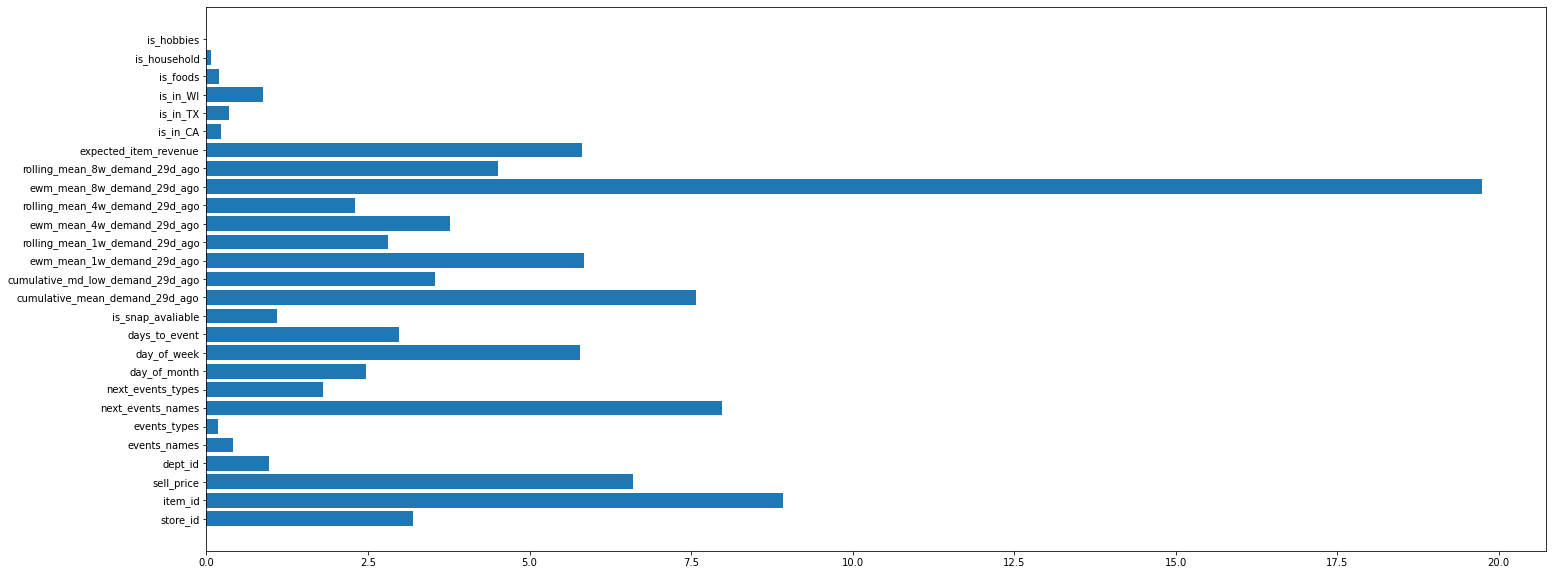

In [71]:
from matplotlib import pyplot as plt
plt.figure(figsize=(24,10))
plt.barh(gbt_regressor.feature_names_, gbt_regressor.feature_importances_)

In [72]:
del dev_pool
gc.collect()

41

In [73]:
cbr = cb.CatBoostRegressor(iterations=int(gbt_regressor.get_best_iteration() * tr_val_ratio),
                            learning_rate=0.1,
                            depth=10,
                            l2_leaf_reg=3.5,
                            model_size_reg=0,
                            rsm=None,
                            loss_function='RMSE',
                            border_count=None,
                            feature_border_type='UniformAndQuantiles',
                            per_float_feature_quantization=None,
                            input_borders=None,
                            output_borders=None,
                            fold_permutation_block=1,
                            od_pval=None,
                            od_wait=None,
                            od_type=None,
                            nan_mode=None,
                            counter_calc_method=None,
                            leaf_estimation_iterations=1,
                            leaf_estimation_method='Newton',
                            thread_count=4,
                            random_seed=42,
                            use_best_model=None,
                            best_model_min_trees=None,
                            verbose=None,
                            silent=None,
                            logging_level=None,
                            metric_period=None,
                            ctr_leaf_count_limit=None,
                            store_all_simple_ctr=None,
                            max_ctr_complexity=None,
                            has_time=True,
                            allow_const_label=None,
                            one_hot_max_size=None,
                            random_strength=1,
                            name=None,
                            ignored_features=None,
                            train_dir=None,
                            custom_metric=None,
                            eval_metric='RMSE',
                            bagging_temperature=None,
                            save_snapshot=None,
                            snapshot_file=None,
                            snapshot_interval=None,
                            fold_len_multiplier=2,
                            used_ram_limit='15gb',
                            gpu_ram_part=None,
                            pinned_memory_size=None,
                            allow_writing_files=False,
                            final_ctr_computation_mode=None,
                            approx_on_full_history=None,
                            boosting_type='Plain',
                            simple_ctr=None,
                            combinations_ctr=None,
                            per_feature_ctr=None,
                            ctr_target_border_count=None,
                            task_type='CPU',
                            device_config=None,                        
                            devices=None,
                            bootstrap_type='MVS',
                            subsample=0.8,                        
                            sampling_unit=None,
                            dev_score_calc_obj_block_size=None,
                            max_depth=None,
                            n_estimators=None,
                            num_boost_round=None,
                            num_trees=None,
                            colsample_bylevel=None,
                            random_state=None,
                            reg_lambda=None,
                            objective=None,
                            eta=None,
                            max_bin=254,
                            gpu_cat_features_storage=None,
                            data_partition=None,
                            metadata=None,
                            early_stopping_rounds=None,
                            cat_features=None,
                            grow_policy=None,
                            min_data_in_leaf=None,
                            min_child_samples=None,
                            max_leaves=None,
                            num_leaves=None,
                            score_function='L2',
                            leaf_estimation_backtracking=None,
                            ctr_history_unit=None,
                            sampling_frequency='PerTreeLevel',
                            monotone_constraints=None,
                            feature_weights=None,
                            penalties_coefficient=None,
                            first_feature_use_penalties=None,
                            model_shrink_rate=1e-5,
                            model_shrink_mode='Constant',
                            langevin=True,
                            diffusion_temperature=1e2,
                            posterior_sampling=None,
                            boost_from_average=False)

In [74]:
cbr.fit(val_pool, verbose=10, init_model=gbt_regressor)

Model shrinkage in combination with learning continuation is not implemented yet. Reset model_shrink_rate to 0.


0:	learn: 2.2725744	total: 7.68s	remaining: 31m 20s
10:	learn: 2.2411194	total: 1m 18s	remaining: 27m 57s
20:	learn: 2.2223862	total: 2m 29s	remaining: 26m 41s
30:	learn: 2.2074359	total: 3m 41s	remaining: 25m 37s
40:	learn: 2.1961044	total: 4m 52s	remaining: 24m 21s
50:	learn: 2.1884930	total: 6m 2s	remaining: 23m 7s
60:	learn: 2.1798727	total: 7m 13s	remaining: 21m 54s
70:	learn: 2.1730026	total: 8m 24s	remaining: 20m 44s
80:	learn: 2.1675520	total: 9m 35s	remaining: 19m 33s
90:	learn: 2.1616483	total: 10m 52s	remaining: 18m 30s
100:	learn: 2.1558470	total: 12m 3s	remaining: 17m 18s
110:	learn: 2.1503172	total: 13m 14s	remaining: 16m 6s
120:	learn: 2.1447764	total: 14m 25s	remaining: 14m 53s
130:	learn: 2.1387880	total: 15m 36s	remaining: 13m 42s
140:	learn: 2.1318708	total: 16m 47s	remaining: 12m 30s
150:	learn: 2.1280910	total: 17m 59s	remaining: 11m 18s
160:	learn: 2.1237277	total: 19m 10s	remaining: 10m 7s
170:	learn: 2.1190151	total: 20m 20s	remaining: 8m 55s
180:	learn: 2.11468

In [75]:
del val_pool, gbt_regressor
gc.collect()

42

In [76]:
X_test['demand'] = np.maximum(cbr.predict(X_test.drop(['date', 'id'], axis=1)), 0)

In [77]:
del cbr
gc.collect()

42

In [78]:
submission = pd.read_csv("../input/m5-forecasting-accuracy/sample_submission.csv")

In [79]:
predictions = X_test.pivot_table(index='id', columns='date', values='demand').reset_index()

In [80]:
del X_test
gc.collect()

21

In [81]:
def get_sub(predictions, submission):
    
    new_cols = [f'F{i}' for i in range(1, 29)]
    validation = predictions.copy()
    validation = validation[validation.columns[1:29]]
    validation = validation.rename({k: v for k, v in zip(validation.columns, new_cols)}, axis=1)
    validation['id'] = predictions['id'].apply(lambda x: x + '_validation')
    
    evaluation = predictions.copy()
    evaluation = evaluation[evaluation.columns[29:]]
    evaluation = evaluation.rename({k: v for k, v in zip(evaluation.columns, new_cols)}, axis=1)
    evaluation['id'] = predictions['id'].apply(lambda x: x + '_evaluation')
    
    sub_1 = pd.merge(submission.loc[:30489, 'id'], validation, how='left')
    sub_2 = pd.merge(submission.loc[30490:, 'id'], evaluation, how='left')
    
    return pd.concat([sub_1, sub_2], axis=0)

In [82]:
submission = get_sub(predictions, submission)

In [83]:
submission.to_csv('submission.csv', index=False)